# Problem Statement

Dateset mentioned below utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)
    
Data set - https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploring DataSet

In [3]:
df.shape

(30, 17)

Observation - this data set is having only 30 rows and 17 columns. Data is quite less to analyse target dependeny on features and model training.

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Description - Columns description
#Feature Columns:
- R - Runs scored: number of times a player crosses home plate
- AB - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H - Hit: reaching base because of a batted, fair ball without error by the defense
- 2B - Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B - Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR - Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB - Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base
- SO - Strike out - number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
- SB - Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER - number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO - Shutout: number of complete games pitched with no runs allowed
- SV - Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result
    
#Target Columns:
- W - respresents no. of wins


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Observation- 
- All variables doesn't contain any missing data or null value
- All variables except ERA are of integer type numeric data.
- Memory usage for this db - 4.1KB

# Null Value/Missing Data Analysis

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation - as we can see count is zero for every column, so there is no missing data

# Zero Value Analysis

In [7]:
(df==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

Observation - there is no zero value in this data base, hence any kind of imputation is also not required

# Discriptive Analysis

In [8]:
df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation-
- W - min wins = 63, max wins = 100, 50% of data shows wins below 81, average no. of wins = 81
- R - min runs = 573, max runs = 891, 50% of data shows runs below 689, average no. of runs = 688
- AB - min at ball = 5385, max at ball = 5649, 50% of data shows at ball below 5510, average no. of at ball = 5516
- H - min hits = 1324, max hits = 1515, 50% of data shows hits below 1382, average no. of hits = 1403
- 2B - min double hits = 236, max double hits = 308, 50% of data shows double hits below 275, average no. of double hits = 274
- 3B - min triple hits = 13, max triple hits = 49, 50% of data shows triple hits below 31, average no. of triple hits = 31
- HR - min home runs = 100, max home runs = 232, 50% of data shows home runs below 158, average no. of home runs = 163
- BB - min base on balls = 375, max base on balls = 570, 50% of data shows base on balls below 473, average no. of base on balls = 469
- SO - min strike outs = 973, max strike outs = 1518, 50% of data shows strike outs below 1261, average no. of strike outs = 1248
- SB - min stolen base = 44, max stolen base = 134, 50% of data shows stolen base below 83, average no. of stolen base = 83
- RA - min runs average = 525, max runs average = 844, 50% of data shows runs average below 695, average no. of runs average = 688
- ER - min earned runs = 478, max earned runs = 799, 50% of data shows earned runs below 644, average no. of earned runs = 635
- ERA - min earned runs average = 3, max earned runs average = 5, 50% of data shows earned runs average below 4, average no. of earned runs average = 4
- CG - min complete game = 0, max complete game = 11, 50% of data shows complete game below 3, average no. of complete game = 3
- SHO - min shutout = 4, max shutout = 21, 50% of data shows shutout below 12, average no. of shutout = 11
- SV - min save = 28, max save = 62, 50% of data shows save below 42, average no. of save = 43
- E - min errors = 75, max errors = 126, 50% of data shows errors below 91, average no. of errors = 94

# Interpreting Relation between Target and Feature Variables

In [9]:
#separating the Features and Target Variable
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

# Analysing Traget Variable

In [10]:
y.nunique() #number of unique values

24

In [11]:
y.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [12]:
y.value_counts() #representing the frequency of unique entries under target column 

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

<AxesSubplot:xlabel='W', ylabel='count'>

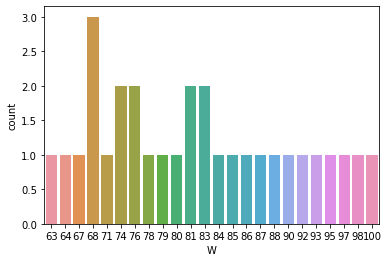

In [13]:
sns.countplot(y)

Observation - Only few no of wins are occuring more than once like 68, 74, 76, 81, 83

# Analysing Feature Variables

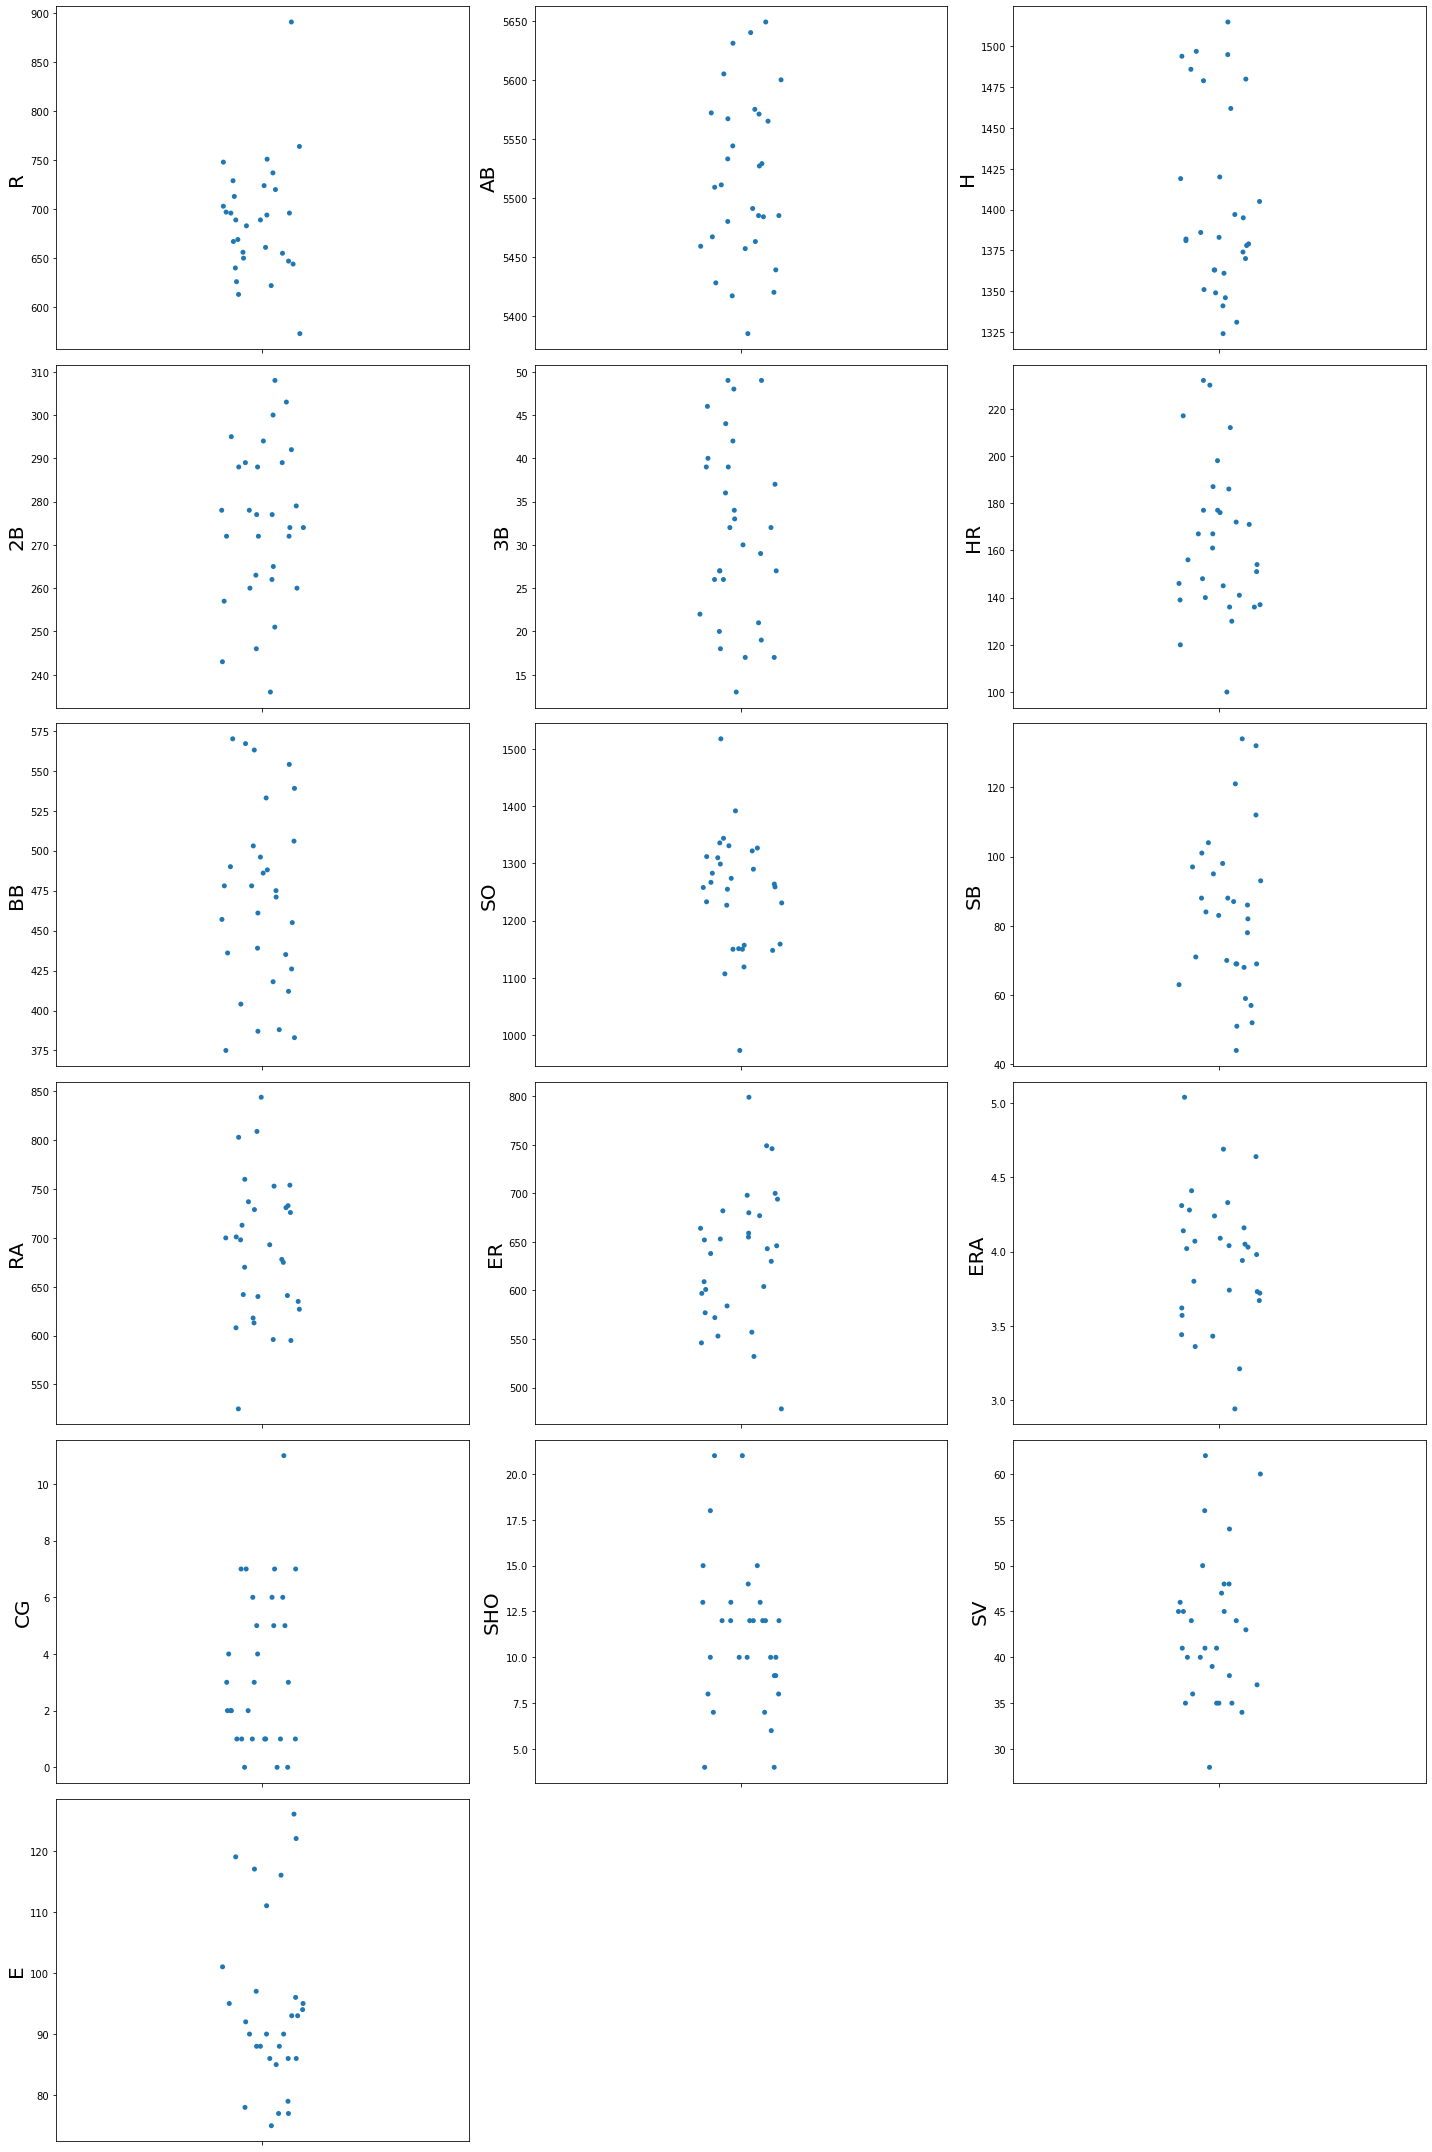

In [14]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x:
        if plotnum<=16:
            plt.subplot(6,3,plotnum)
            sns.stripplot(y=col, data=df)
            plt.ylabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observation - this plot is showing how data is ditributed over the range of values

# Analysing the variation of Target(Wins) wrt all Features

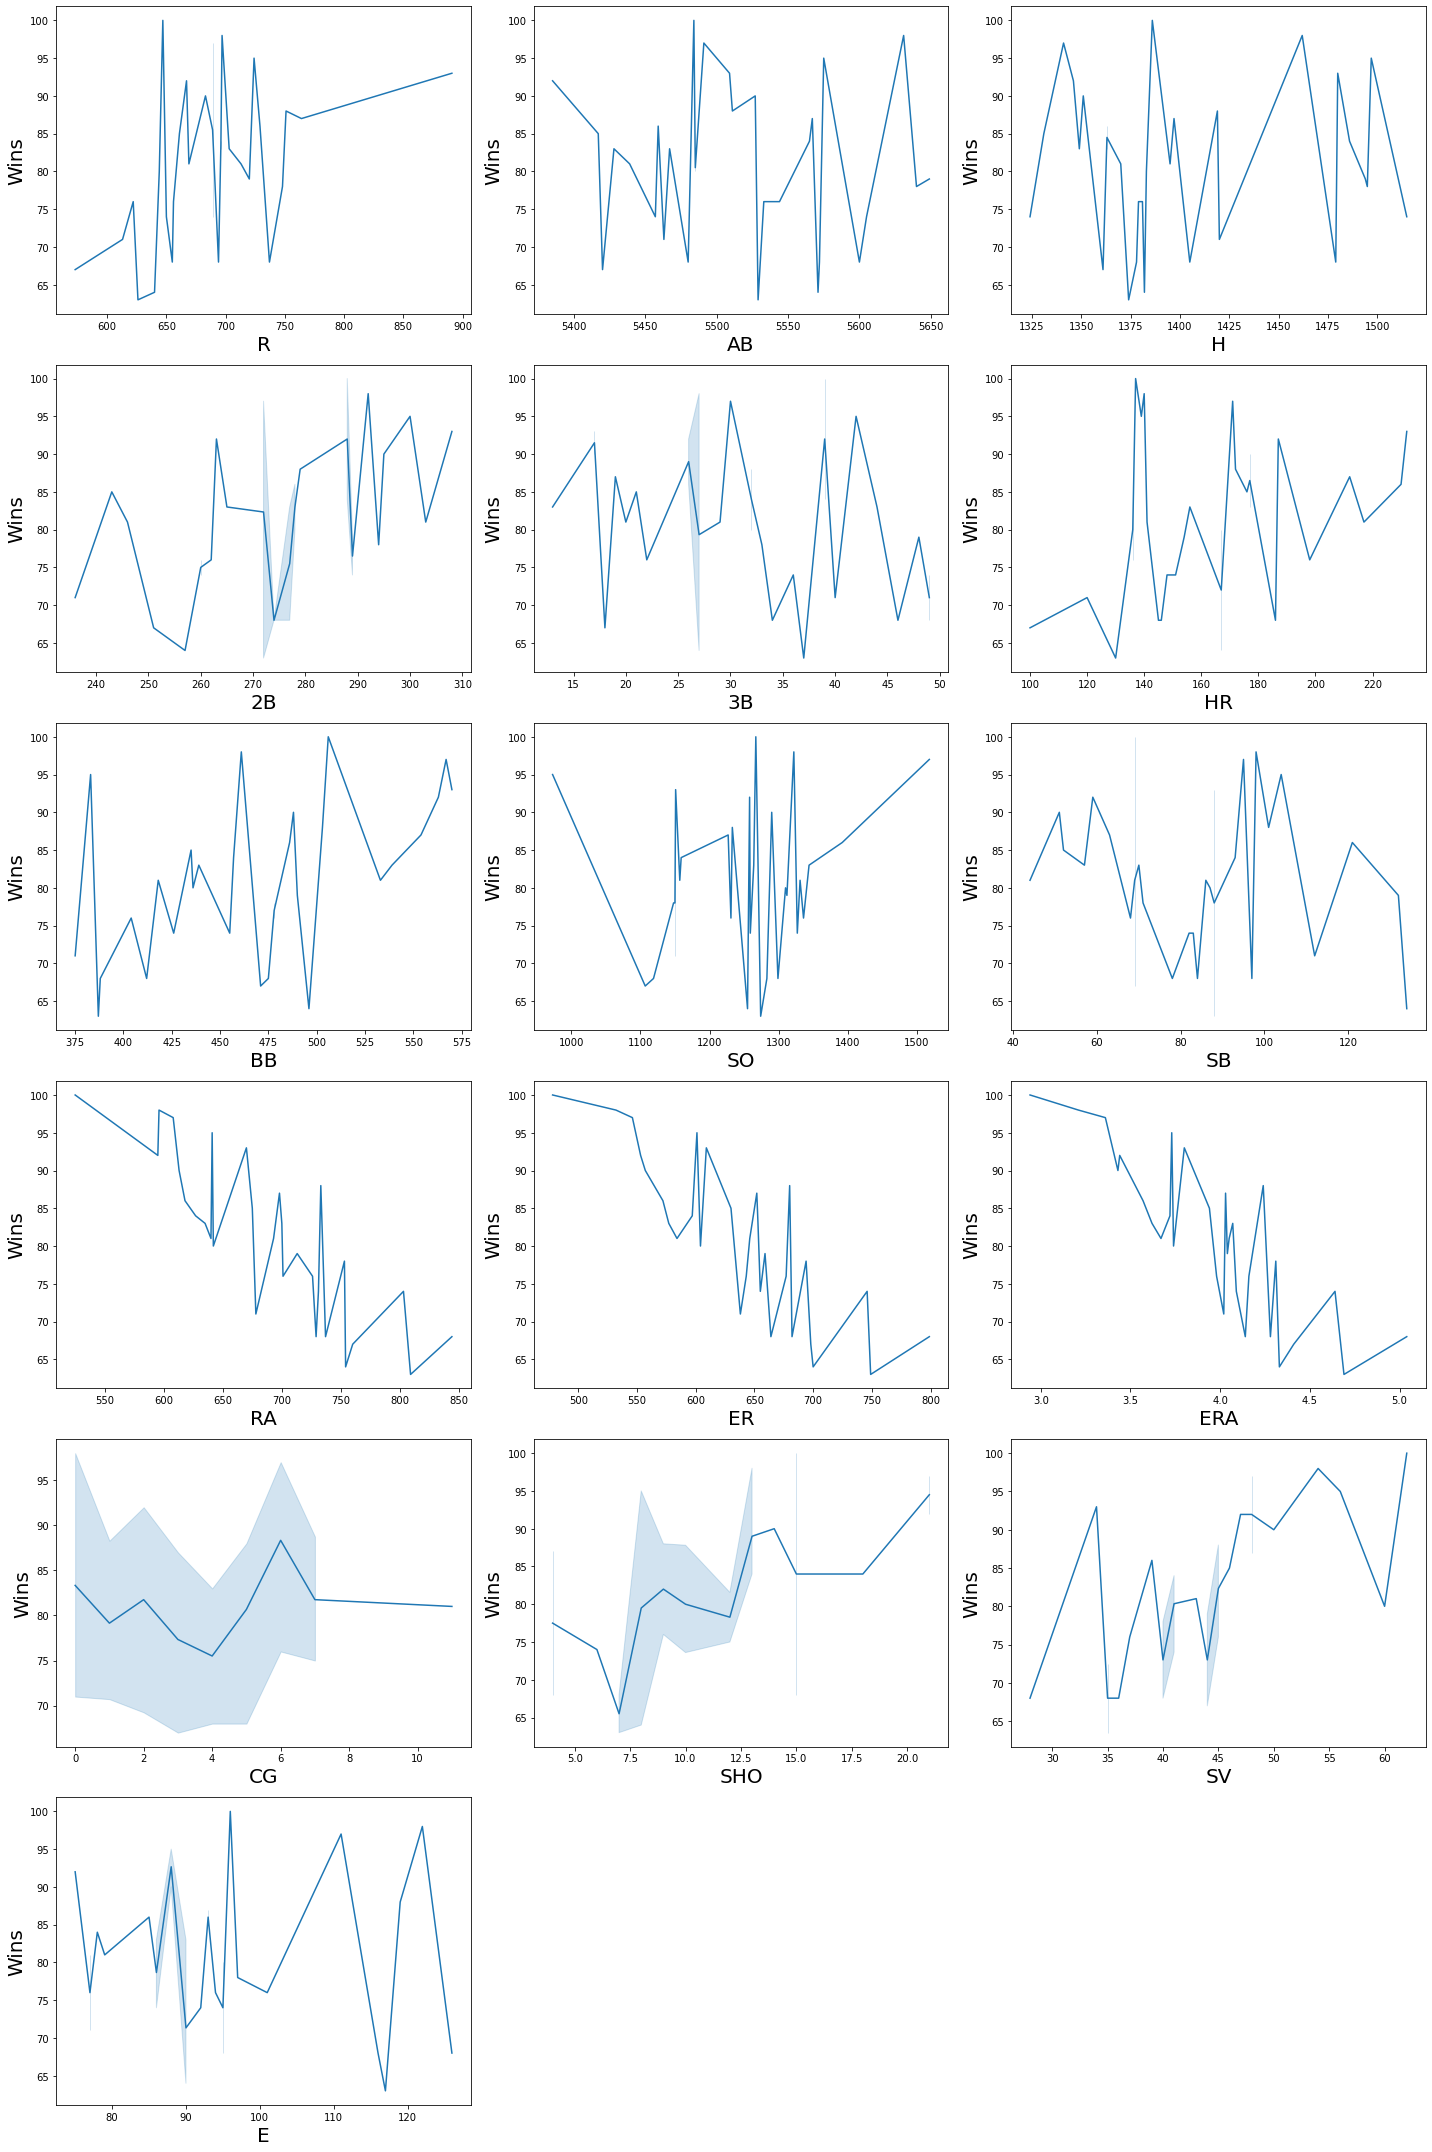

In [15]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x:
        if plotnum<=16:
            plt.subplot(6,3,plotnum)
            sns.lineplot(x[col],y)
            plt.ylabel('Wins',fontsize=20)
            plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observation - There is not so linear relation between the target ad feature variables but we can easlily see that winning chances increases if the number of runs, doubles, homeruns, shutouts and the strike rate increases but the winnning chances decreases if the error rate, triple hits or stolen base increases increases. Will observe the correlation between feature and target later.

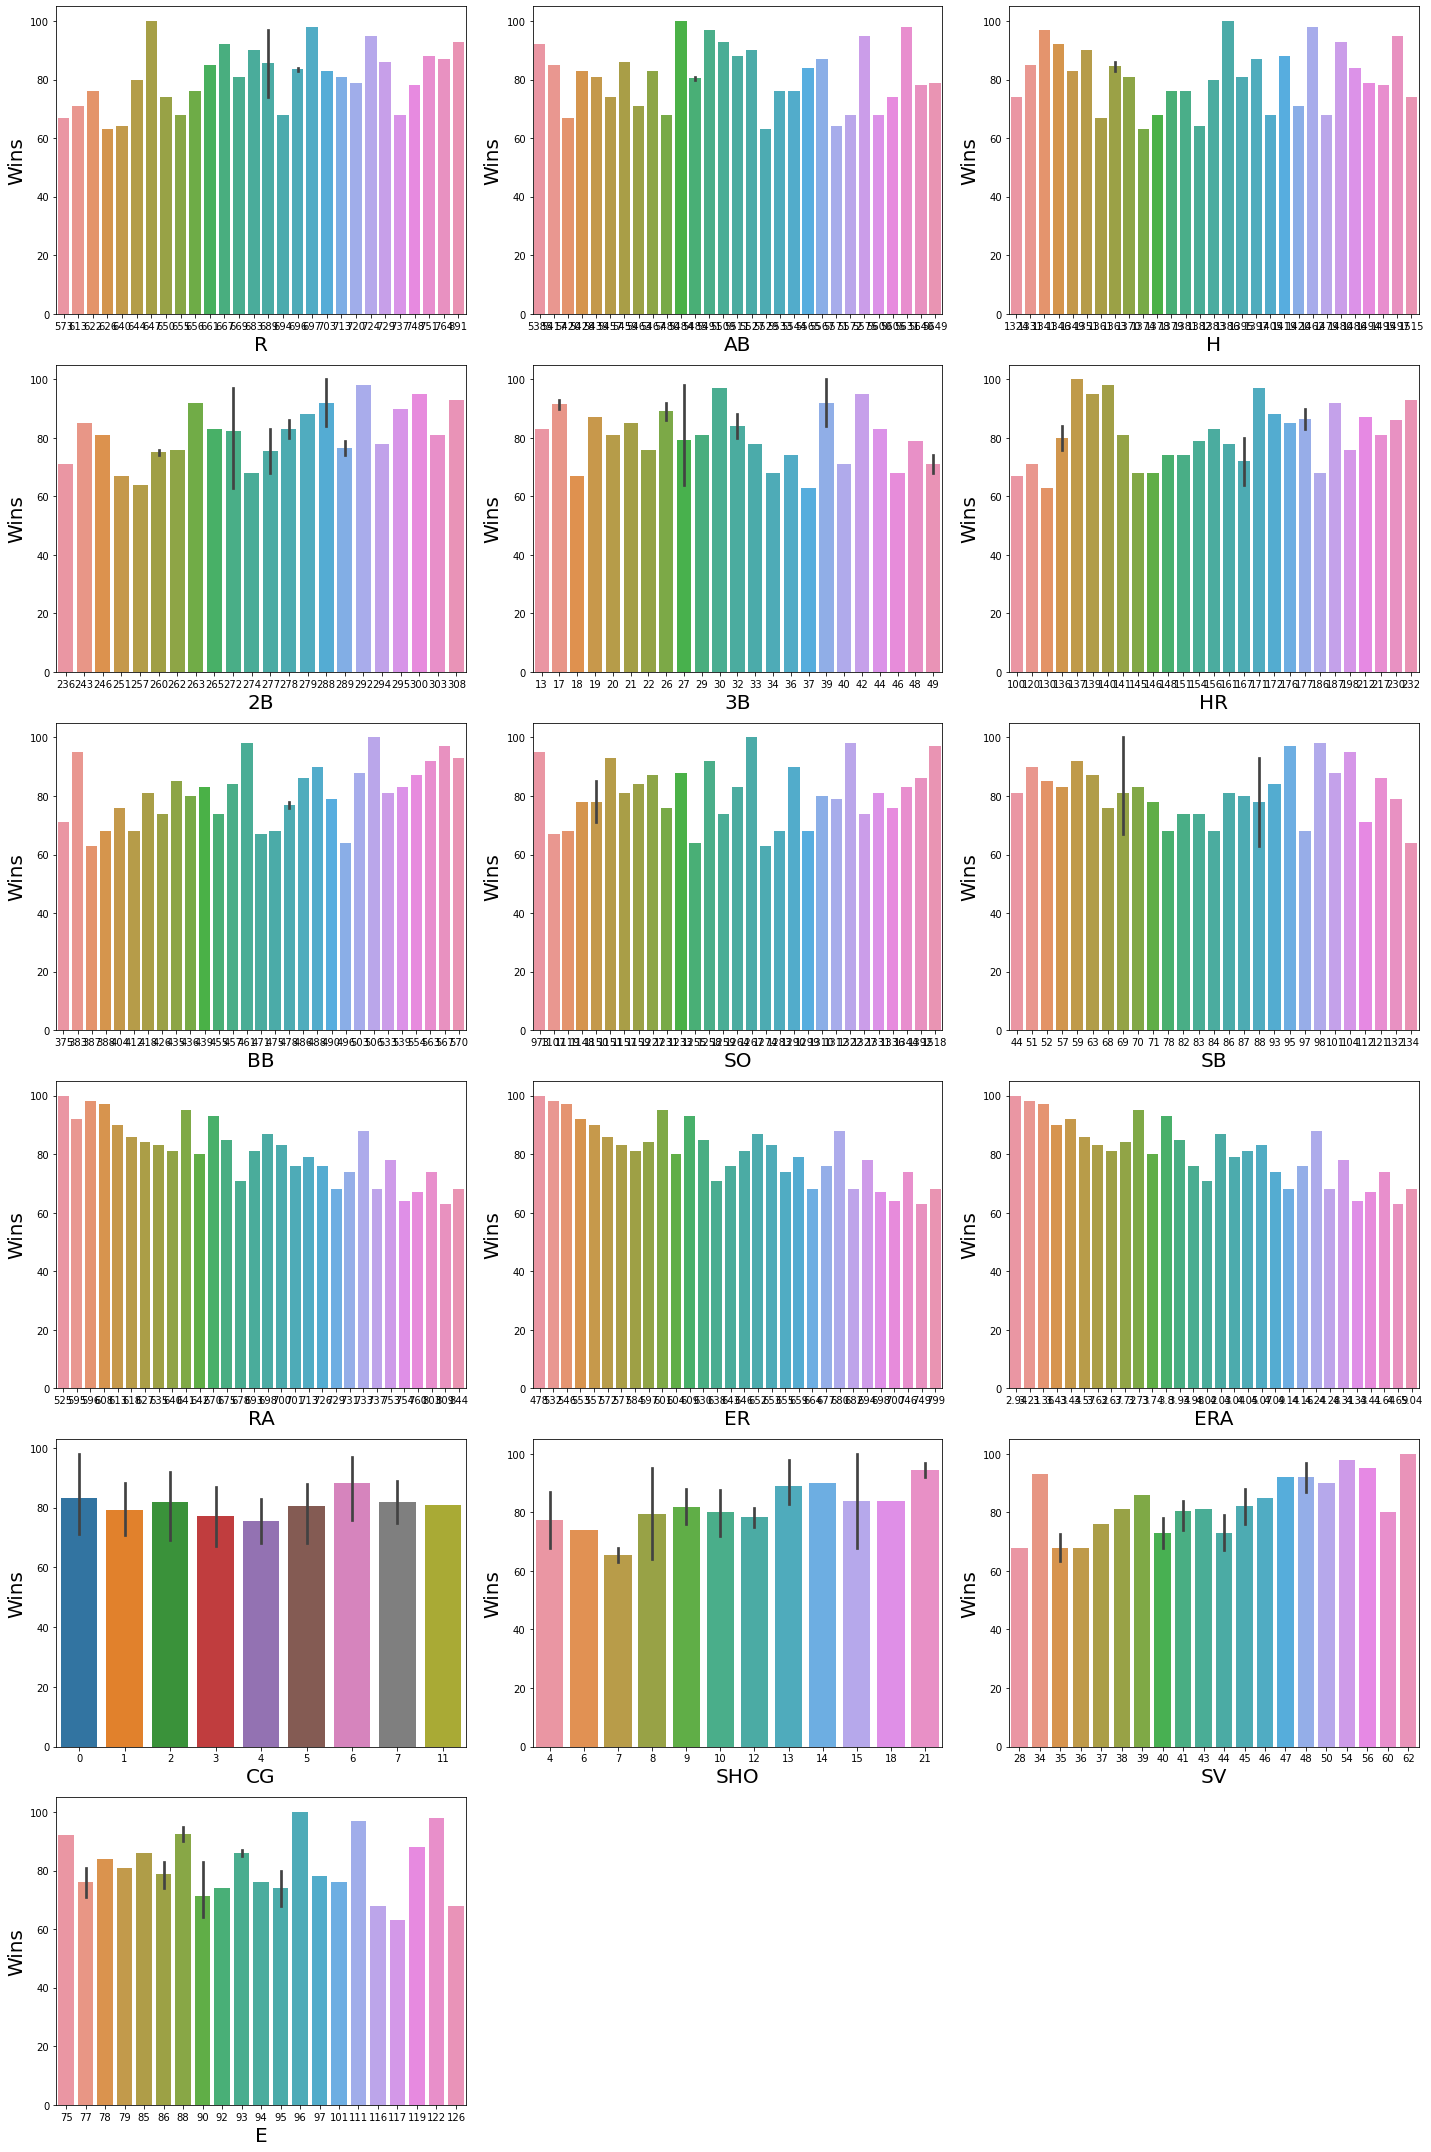

In [16]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x:
        if plotnum<=16:
            plt.subplot(6,3,plotnum)
            sns.barplot(x[col],y)
            plt.ylabel('Wins',fontsize=20)
            plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.tight_layout()

Observation - Using bar plot we can't state direct relation between the target and feature.

# Visualizing all data together

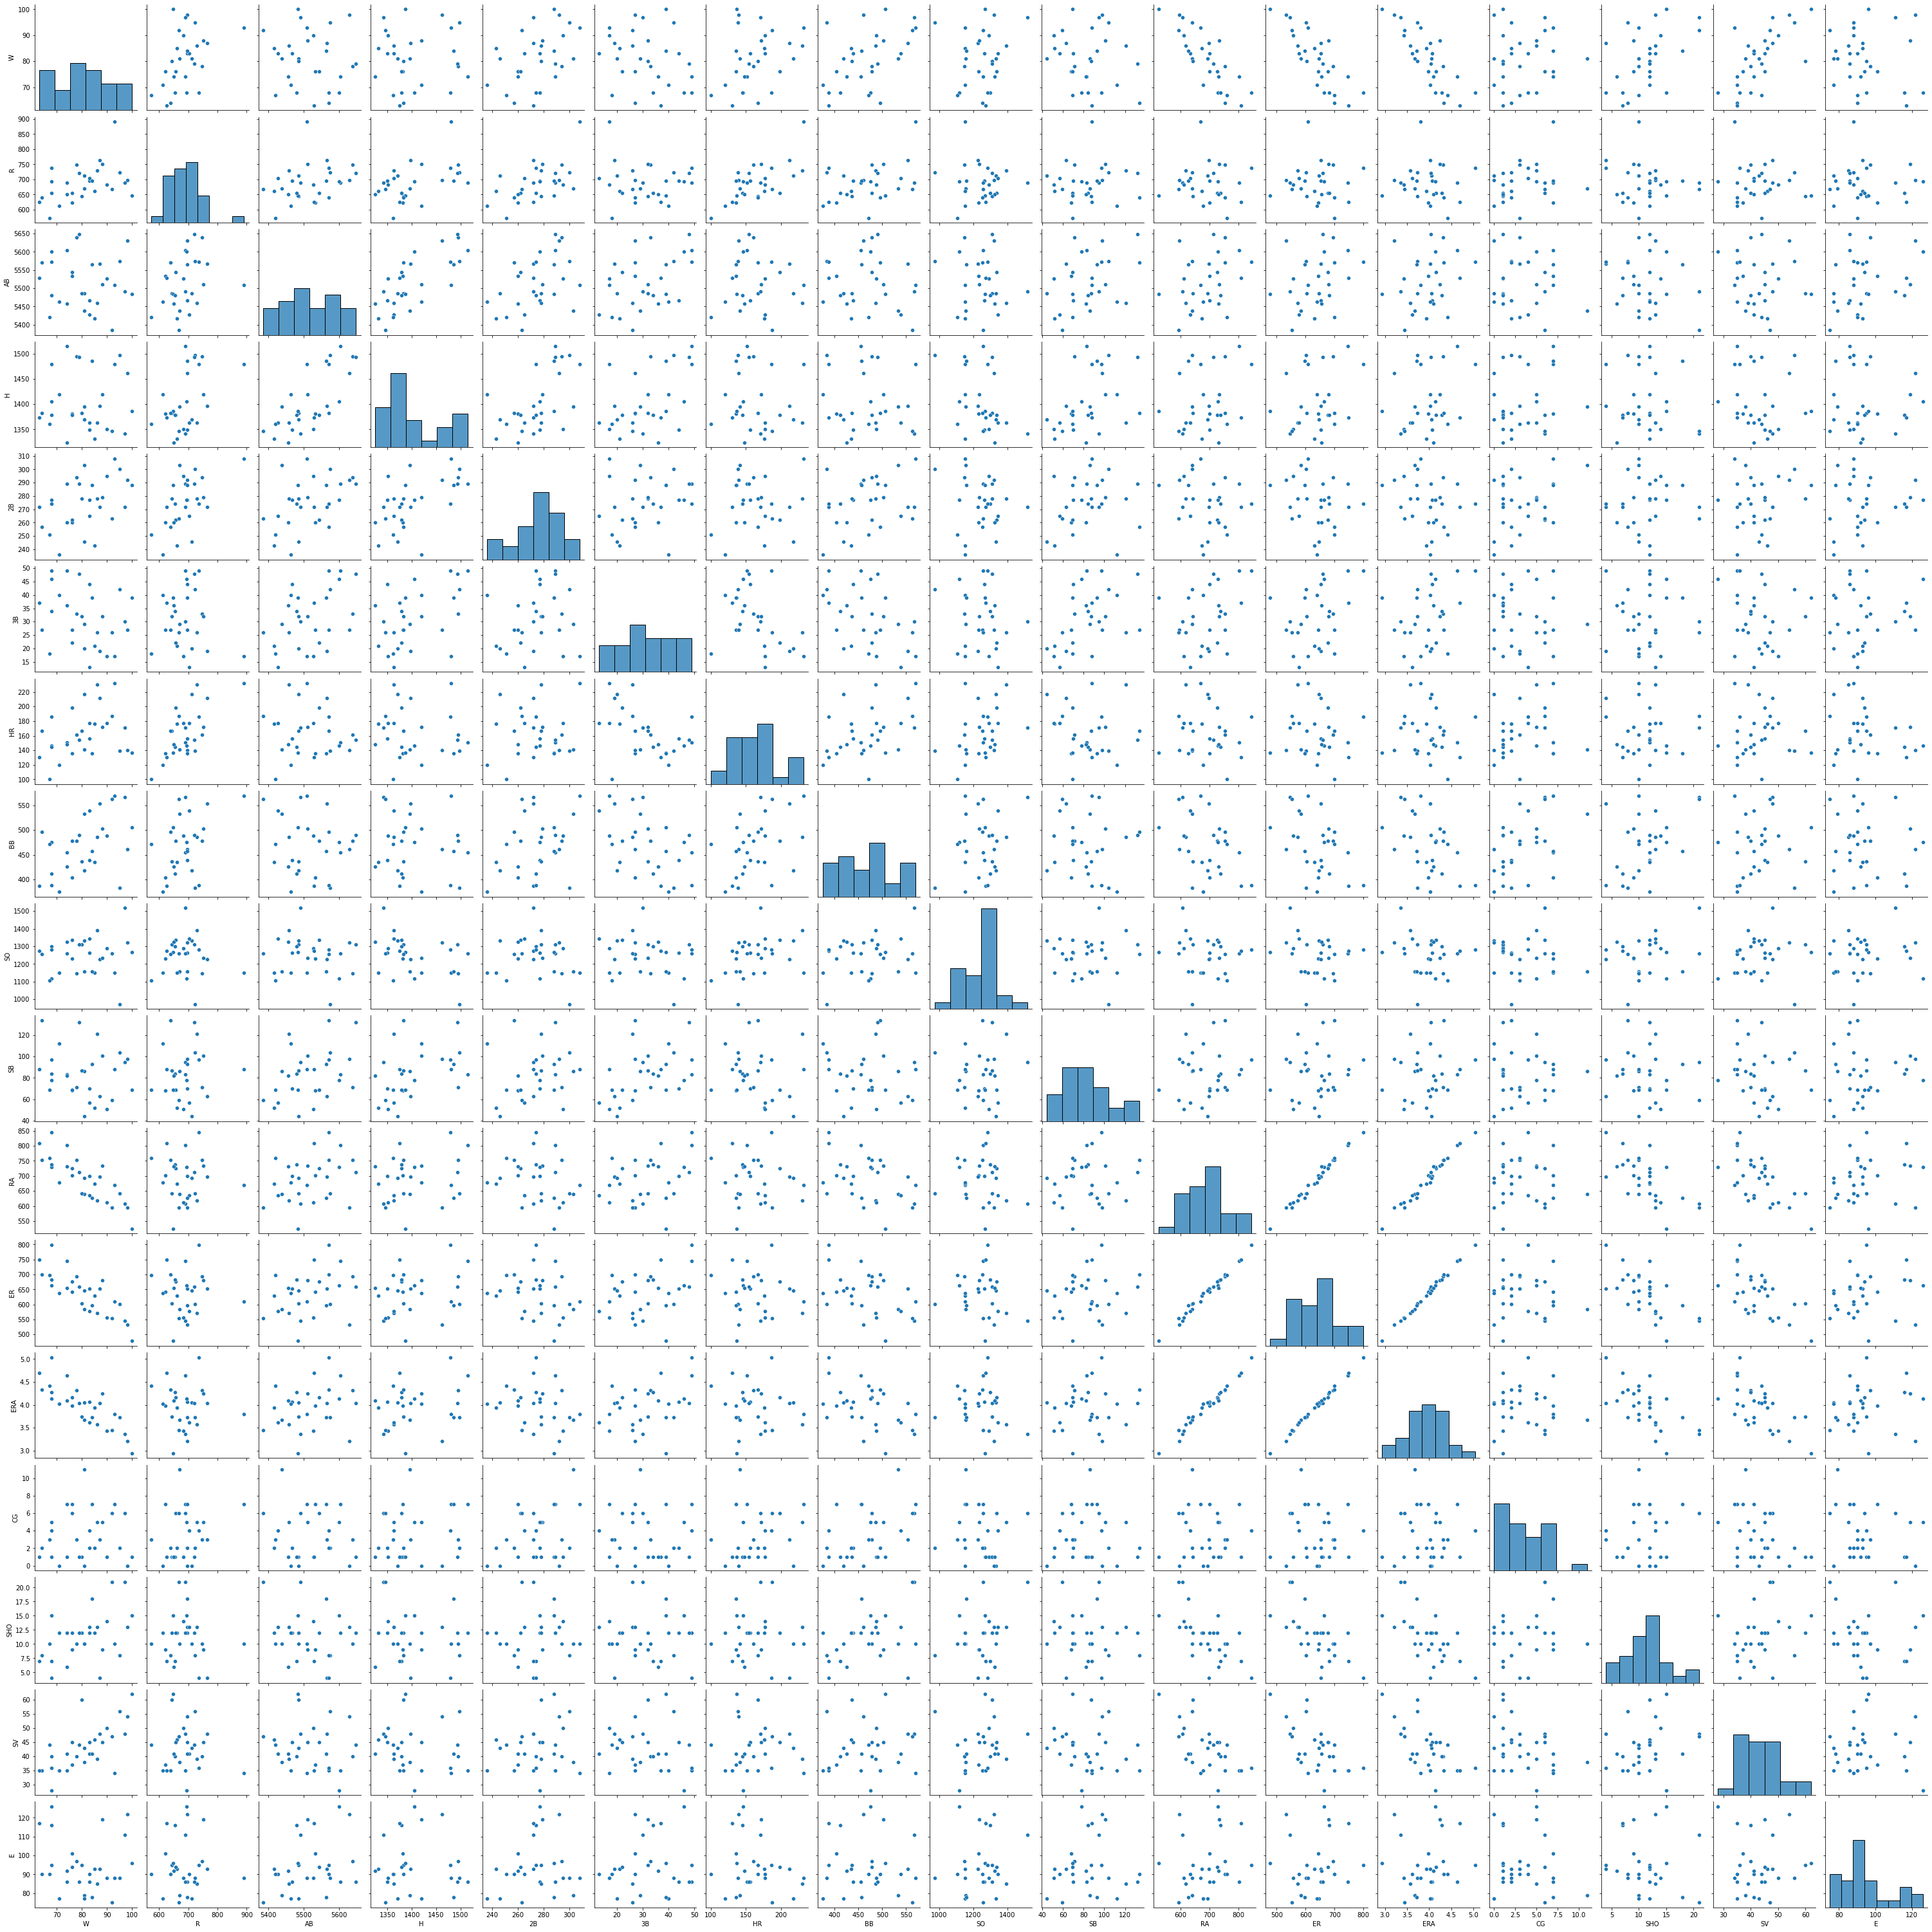

In [17]:
sns.pairplot(df)

# Finding Correlation

In [18]:
#lets find out the correlation between the columns
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


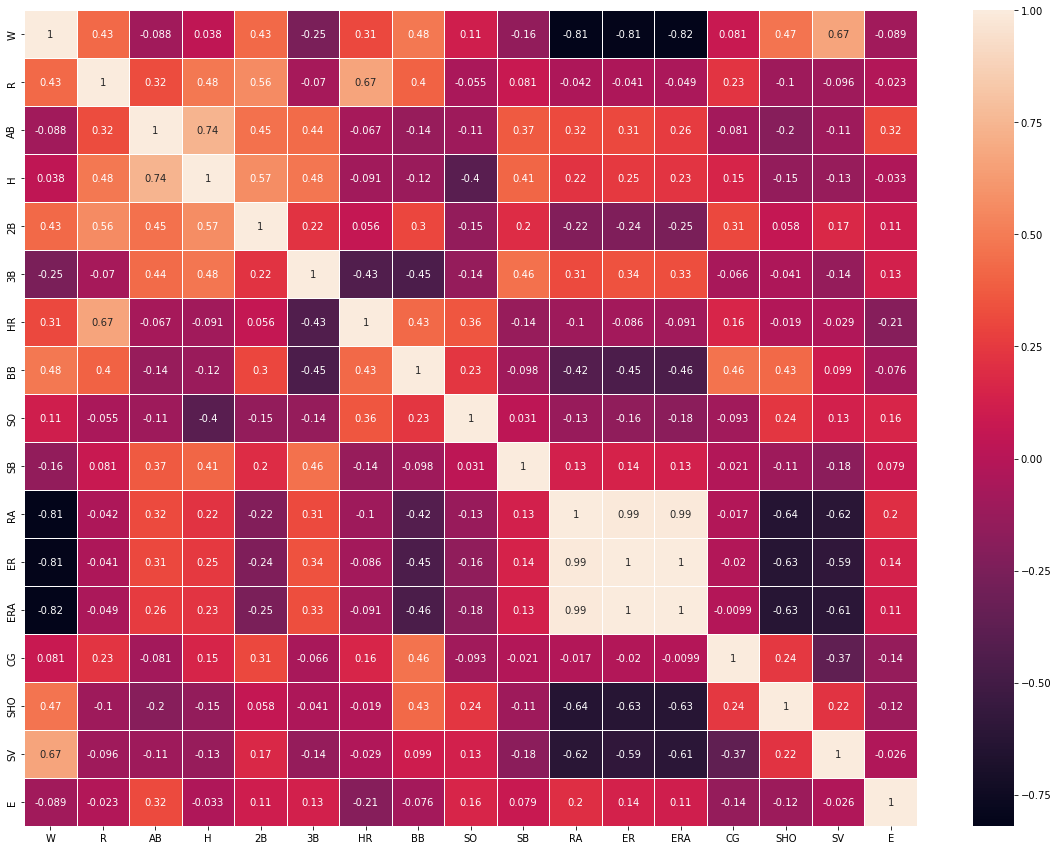

In [19]:
#lets plot the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

Observation - Some of the feature variable are highly correlated to each other so there can be multicollinearity issue, which we will be calculating using VIF score. 

In [20]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

Observation - Some of the feature varible are -vely created and some are +vely correalted to target. Lets try to plot the correaltion

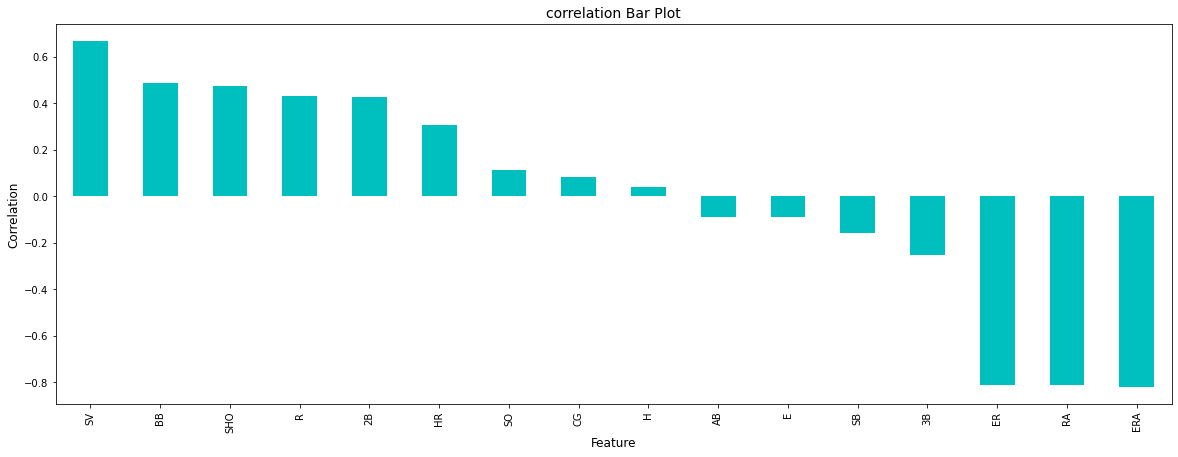

In [21]:
#Plotting the correlation
plt.figure(figsize=(20,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation - 
- ERA, RA have strong -ve correlation with W -81%
- ER also have strong -ve correlation with W -80%
- 3B have good -ve bond with W as 25%
- E, AB, H, CG, SO have weak bonds
- HR, 2B, R, SHO, BB have good +ve correlation with W
- SV have strong +ve correlation with W

# Detecting Multicollinearity with VIF and Data Cleaning

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

   feature           VIF
0        R   1638.985029
1       AB   4277.157018
2        H   4698.798408
3       2B    904.439835
4       3B     32.435486
5       HR    285.773237
6       BB    269.485018
7       SO    398.234104
8       SB     28.654970
9       RA  17204.829356
10      ER  49837.289228
11     ERA  23551.544014
12      CG      6.771036
13     SHO     30.276598
14      SV    119.686080
15       E     94.215202


Observation - 
VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

ERA, ER and RA are highly collinear, lets drop ER similarly H and AB are highly collinear lets drop H between them. So dropping H and ER and calculating VIF again

In [23]:
# VIF dataframe
vif_data1 = pd.DataFrame()

df.drop(['ER','H'],axis=1, inplace=True)
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

vif_data1["feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data1)

   feature          VIF
0        R   890.050874
1       AB  1859.280337
2       2B   891.497443
3       3B    30.218753
4       HR   164.900530
5       BB   235.798169
6       SO   346.769029
7       SB    22.947838
8       RA  8388.034218
9      ERA  6577.696179
10      CG     6.403656
11     SHO    27.883084
12      SV    94.817123
13       E    78.288499


lets drop AB and RA too and calculate VIF again

In [24]:
# VIF dataframe
vif_data2 = pd.DataFrame()

df.drop(['RA','AB'],axis=1, inplace=True)
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

vif_data2["feature"] = x.columns
vif_data2["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data2)

   feature         VIF
0        R  827.551781
1       2B  703.489173
2       3B   27.099437
3       HR  150.921970
4       BB  208.880035
5       SO  273.208168
6       SB   21.660649
7      ERA  115.674526
8       CG    5.845882
9      SHO   19.064658
10      SV   65.731551
11       E   64.034331


Lets drop R and SO too

In [25]:
# VIF dataframe
vif_data3 = pd.DataFrame()

df.drop(['R','SO'],axis=1, inplace=True)
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

vif_data3["feature"] = x.columns
vif_data3["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data3)

  feature         VIF
0      2B  325.286365
1      3B   26.099726
2      HR   41.929149
3      BB  187.807560
4      SB   20.753765
5     ERA   87.967089
6      CG    5.188178
7     SHO   15.915347
8      SV   58.282943
9       E   54.474446


Lets drop 2B

In [26]:
# VIF dataframe
vif_data4 = pd.DataFrame()

df.drop(['2B'],axis=1, inplace=True)
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

vif_data4["feature"] = x.columns
vif_data4["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data4)

  feature         VIF
0      3B   22.001437
1      HR   40.741629
2      BB  155.108201
3      SB   20.310136
4     ERA   81.598526
5      CG    4.675125
6     SHO   15.626228
7      SV   40.418384
8       E   50.635997


Lets drop BB too

In [27]:
# VIF dataframe
vif_data5 = pd.DataFrame()

df.drop(['BB'],axis=1, inplace=True)
x = df.drop(columns = ['W']) #feature variables
y = df['W'] #target variable

vif_data5["feature"] = x.columns
vif_data5["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data5)

  feature        VIF
0      3B  18.643848
1      HR  33.549511
2      SB  18.520539
3     ERA  73.593092
4      CG   3.513377
5     SHO  11.980562
6      SV  31.947644
7       E  47.153581


Observation - VIF is still not under control but not going to drop any column further.. will select K best features to train my model later

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
2,SB,3.145176
6,SV,2.966365
7,E,2.403946
3,ERA,1.665038
5,SHO,1.204067
1,HR,0.989166
0,3B,0.850035
4,CG,0.383449


Observation - Selecting top 7 columns from data set

In [29]:
df.drop(['CG'], axis=1, inplace=True)
df.head()

,W,3B,HR,SB,ERA,SHO,SV,E
0,95,42,139,104,3.73,8,56,88
1,83,44,156,70,4.07,12,45,86
2,81,29,141,86,3.67,10,38,79
3,76,27,136,68,3.98,9,37,101
4,74,49,151,83,4.64,12,35,86


In [30]:
df.shape

(30, 8)

# Skewness

In [31]:
df.skew()

W      0.047089
3B     0.129502
HR     0.516441
SB     0.479893
ERA    0.053331
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Observation-

The acceptable skewness range is +/- 0.5, SV, E have little skewness involved

# Distribution Curve

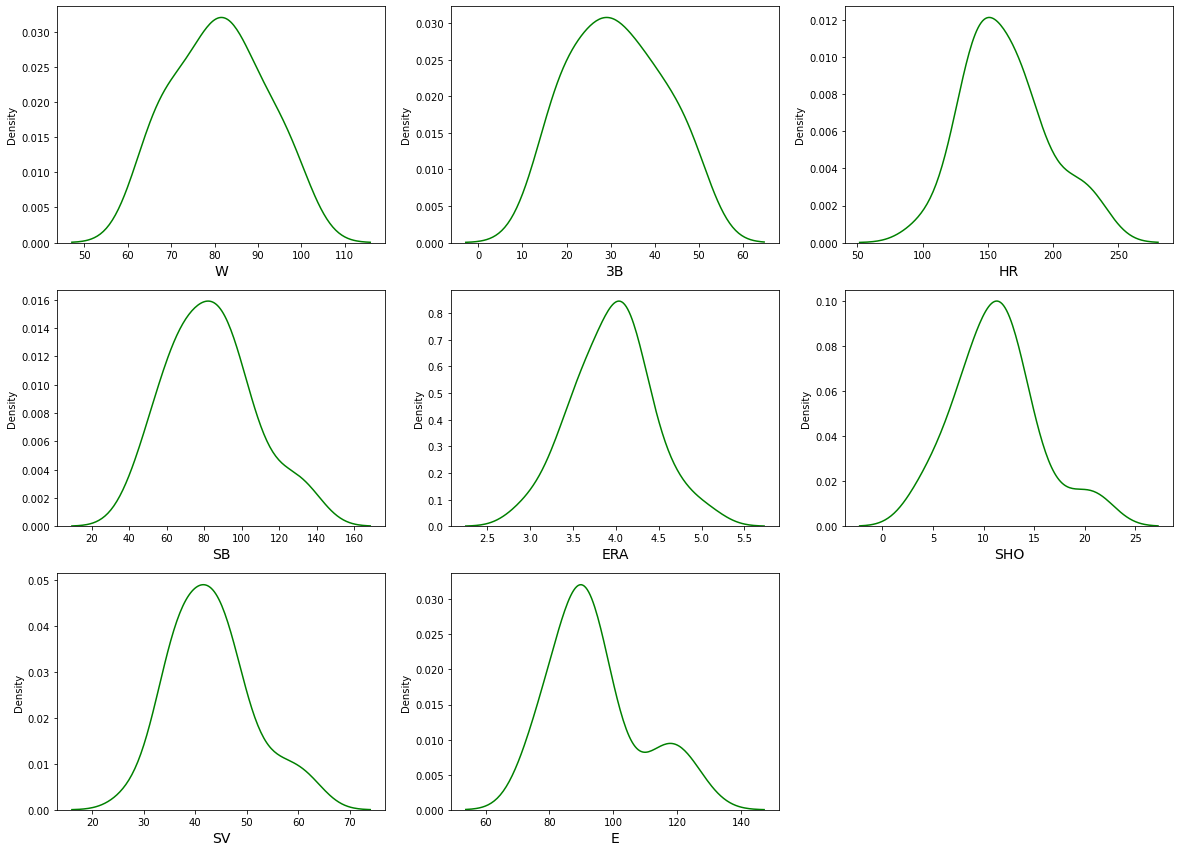

In [32]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=8:
        plt.subplot(4,3,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

We need to treat the skewness. lets check outliers using BOX plot and Z Score

# Checking Outliers

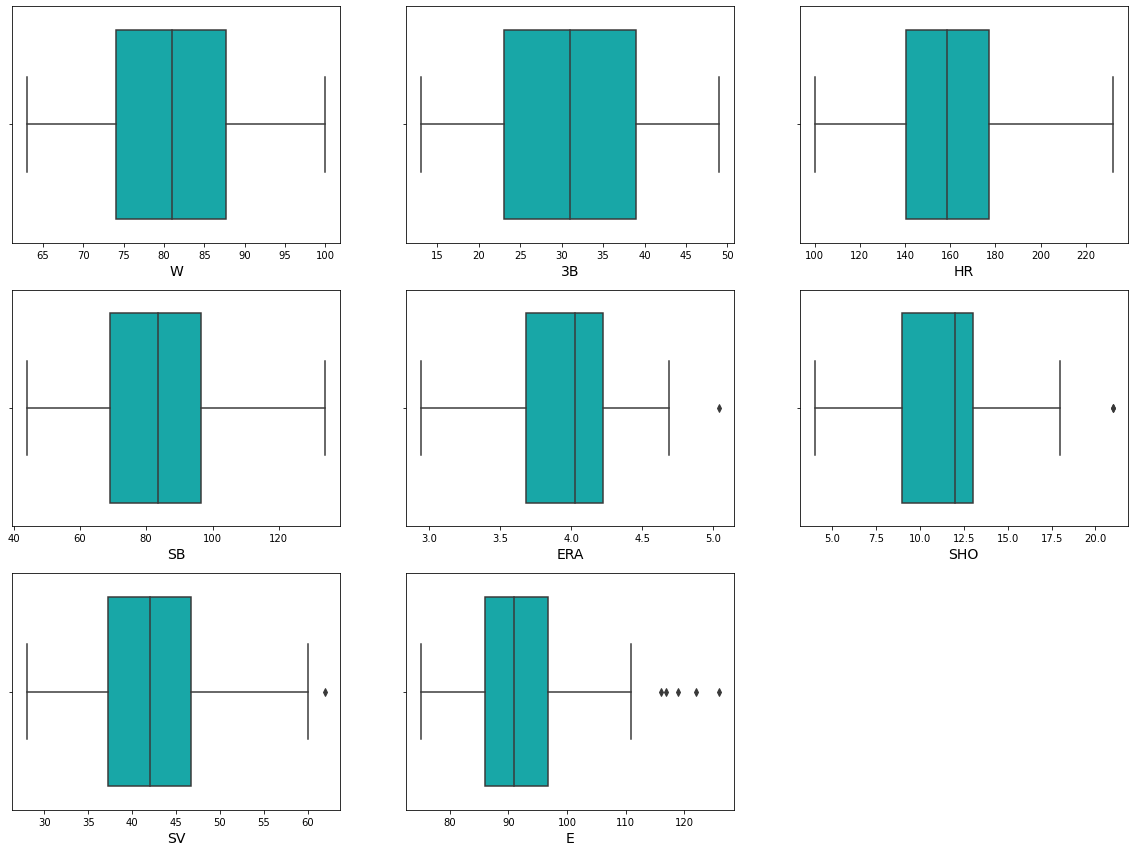

In [33]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=8:
        plt.subplot(4,3,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - few of the columns ar having outliers - ERA, SHO, SV, E

# Removing Outliers

In [34]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,W,3B,HR,SB,ERA,SHO,SV,E
0,1.365409,1.041193,-0.787299,0.913883,-0.506955,-0.814629,1.671607,-0.461470
1,0.197838,1.235809,-0.243967,-0.601826,0.254598,0.172800,0.249879,-0.607197
2,0.003243,-0.223808,-0.723377,0.111449,-0.641347,-0.320914,-0.654856,-1.117242
3,-0.483244,-0.418423,-0.883181,-0.690985,0.053010,-0.567771,-0.784104,0.485758
4,-0.677839,1.722347,-0.403770,-0.022290,1.531318,0.172800,-1.042600,-0.607197
5,1.170814,-1.391501,2.185047,0.200609,-0.350165,-0.320914,-1.171848,-0.461470
6,0.587028,-1.196885,1.545833,-0.913883,0.165003,-1.802057,0.637623,-0.097152
7,0.003243,-1.099578,1.705636,-1.760897,0.209800,-0.320914,-0.008617,-1.262970
8,-0.094054,0.068115,0.107601,0.156029,-0.484557,0.172800,2.188598,0.048576
9,-0.288649,0.165423,-0.084163,-0.557246,0.792164,-0.320914,-0.396360,0.194303


In [35]:
z = np.abs(zscore(df))
z.shape

(30, 8)

In [36]:
np.where(z>3) #detecting outliers where z>3

(array([], dtype=int64), array([], dtype=int64))

Observation - no outliers detected using Z score method, So using IQR method to treat outliers

# Treating Outliers using IQR method

In [37]:
X = df.drop('W', axis=1)
Y = df['W']
#create new dataframe
X_new = pd.DataFrame()
X_new

def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    med = data.median() # calculating median

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = med    #replacing outlier with median
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new

,3B,HR,SB,ERA,SHO,SV,E
0,42,139,104,3.730,8.0,56.0,88.0
1,44,156,70,4.070,12.0,45.0,86.0
2,29,141,86,3.670,10.0,38.0,79.0
3,27,136,68,3.980,9.0,37.0,101.0
4,49,151,83,4.640,12.0,35.0,86.0
5,17,232,88,3.800,10.0,34.0,88.0
6,19,212,63,4.030,4.0,48.0,93.0
7,20,217,44,4.050,10.0,43.0,77.0
8,32,167,87,3.740,12.0,60.0,95.0
9,33,161,71,4.310,10.0,40.0,97.0


In the above method we detected the Outliers using IQR method and replaced them with median. now lets check the outliers again using Box Plot.

# Ploting Boxplot

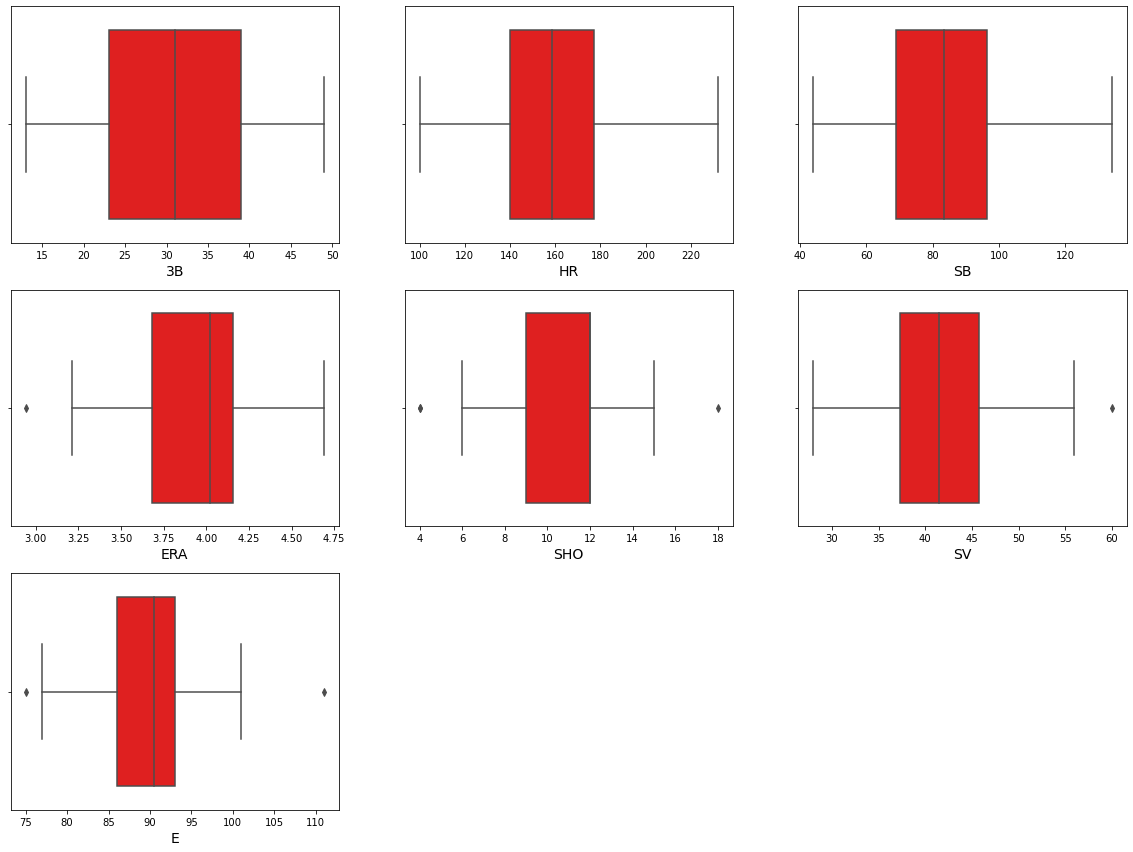

In [38]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=8:
        plt.subplot(4,3,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Outliers have been treated to a greater extend. We cann treat the remaining further using Power Transform Later on

# Transforming data to remove skewness further (Power Transform)

In [39]:
from sklearn.preprocessing import power_transform

X = power_transform(X_new, method='yeo-johnson')
type(X)
X

array([[ 1.03310301, -0.76462586,  0.93970819, -0.53683262, -0.88283219,
         1.80534634, -0.17657117],
       [ 1.2033202 , -0.15858141, -0.53969308,  0.32262832,  0.39168639,
         0.44849831, -0.45187241],
       [-0.16026987, -0.68967629,  0.2119555 , -0.67932641, -0.25991787,
        -0.59836014, -1.44997929],
       [-0.36052064, -0.8790486 , -0.64256433,  0.08643096, -0.57521842,
        -0.76325792,  1.51950591],
       [ 1.61644394, -0.3298501 ,  0.07962852,  1.96823602,  0.39168639,
        -1.10663922, -0.45187241],
       [-1.4610616 ,  1.93785984,  0.29823789, -0.3671428 , -0.25991787,
        -1.28563371, -0.17657117],
       [-1.22491064,  1.46009864, -0.91015416,  0.21687128, -2.0212352 ,
         0.84864587,  0.49412487],
       [-1.11030224,  1.58355136, -2.10289743,  0.26959335, -0.25991787,
         0.16679332, -1.74577479],
       [ 0.130611  ,  0.20005848,  0.25528505, -0.51281905,  0.39168639,
         2.23388068,  0.75575389],
       [ 0.2252559 ,  0.0074

In [40]:
X.ndim

2

In [41]:
X.mean()

7.486075251758198e-16

In [42]:
X.std()

1.0

mean = 0 and Standard deviation = 1.0

In [43]:
X.shape

(30, 7)

# Feature Scaling using Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X

,0,1,2,3,4,5,6
0,1.033103,-0.764626,0.939708,-0.536833,-0.882832,1.805346,-0.176571
1,1.203320,-0.158581,-0.539693,0.322628,0.391686,0.448498,-0.451872
2,-0.160270,-0.689676,0.211956,-0.679326,-0.259918,-0.598360,-1.449979
3,-0.360521,-0.879049,-0.642564,0.086431,-0.575218,-0.763258,1.519506
4,1.616444,-0.329850,0.079629,1.968236,0.391686,-1.106639,-0.451872
5,-1.461062,1.937860,0.298238,-0.367143,-0.259918,-1.285634,-0.176571
6,-1.224911,1.460099,-0.910154,0.216871,-2.021235,0.848646,0.494125
7,-1.110302,1.583551,-2.102897,0.269593,-0.259918,0.166793,-1.745775
8,0.130611,0.200058,0.255285,-0.512819,0.391686,2.233881,0.755754
9,0.225256,0.007404,-0.489090,0.983675,-0.259918,-0.281016,1.013780


# Plotting the distribution plot again

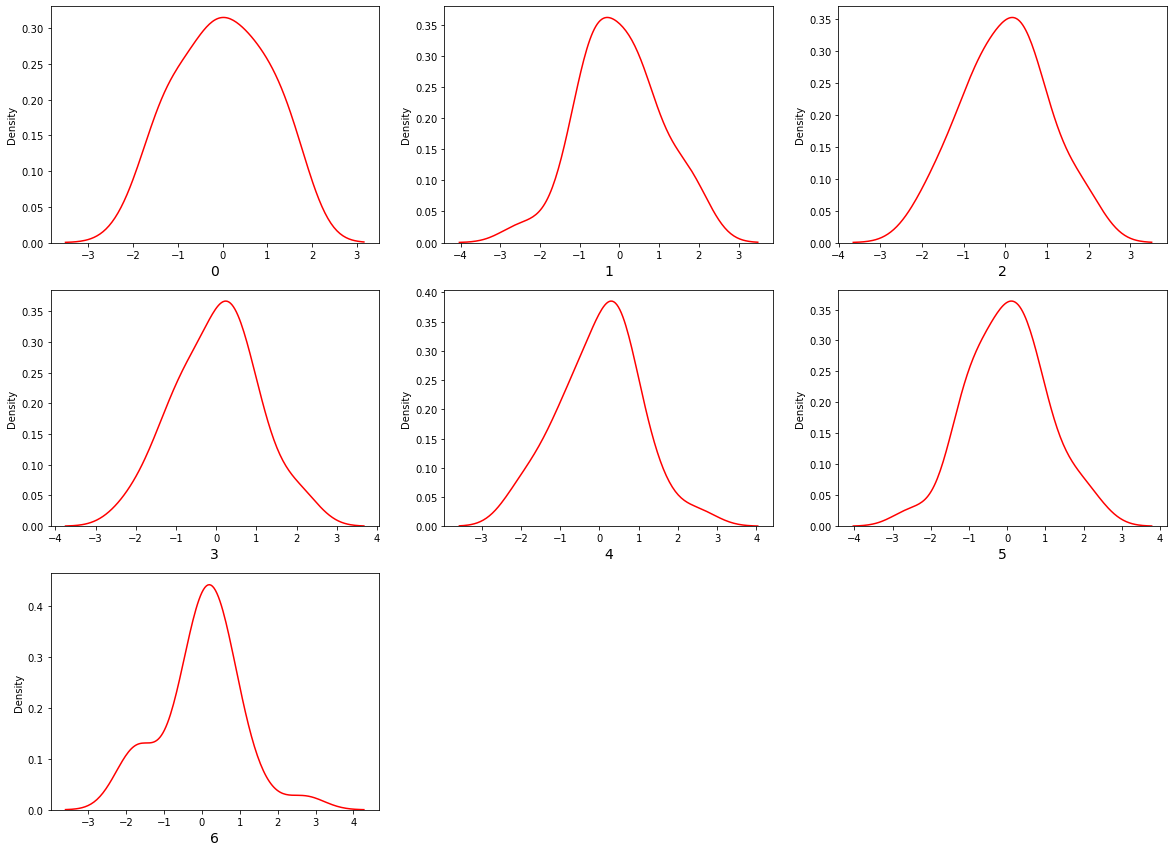

In [45]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in X.columns:
    if plotnum<=8:
        plt.subplot(4,3,plotnum)
        sns.kdeplot(X[col], color = 'r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - We can observe that all the feature variables are normalized now.

# Model Building

I will train the follwoing models - 
- A. Linear Regression
- B. Random Forest Regressor
- C. Decision Tree Regressor
- D. K Neighbors Regressor
- E. SVR
- F. SGD Regressor

In [46]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


# Finding best Random State

In [47]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_test = r2_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('Test Accuracy is max:',maxAccu,'random_state is:',maxRS)

Test Accuracy is max: 0.9575079510952885 random_state is: 99


Observation - test accuracy is best ie 95.7% at random_state = 99

# Creating the Training and Testing data set

In [48]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS,shuffle = True, test_size=0.20)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [49]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    
    #accracy score
    rs = r2_score(y_test,pred)
    print('R2 Score :',rs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=5).mean()
    print('Cross validation score :',cvs)
    
    
    #difference in accuracy and cross validation score
    diff = abs(rs - cvs)
    print('R2 Score and CV Score Diff :', diff)  
    
    #mean square error
    mse = mean_squared_error(y_test, pred)
    print('Mean squared error:',mse)
    
    #mean absolute error
    mae = mean_absolute_error(y_test, pred)
    print('Mean Absolute error:',mae)
    
    #appending data to dataframe
    models_df[sc] = [model_name, rs, cvs, diff, mse, mae]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual Wins', fontsize = 14)
    plt.ylabel('Predicted Wins', fontsize = 14)
    plt.show()

# A) Linear Regression

R2 Score : 0.9575079510952885
Cross validation score : -0.45783134964054895
R2 Score and CV Score Diff : 1.4153393007358375
Mean squared error: 5.756492291896616
Mean Absolute error: 1.9519702048750294


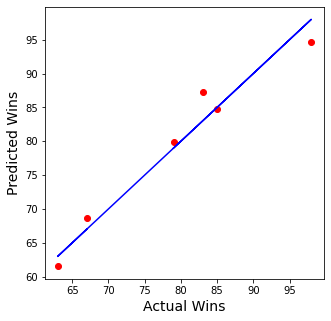

In [50]:
reg_func(LinearRegression(),X,Y, 'LinearRegression','lr')

# B. Random Forest Regressor

R2 Score : 0.6603688743079762
Cross validation score : -0.8896616366646036
R2 Score and CV Score Diff : 1.5500305109725798
Mean squared error: 46.01058333333335
Mean Absolute error: 5.5950000000000015


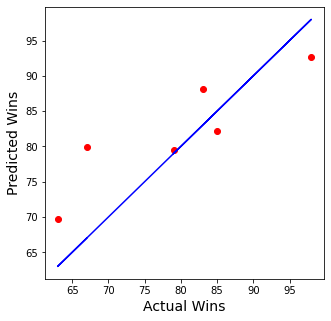

In [51]:
reg_func(RandomForestRegressor(),X,Y, 'RandomForestRegressor','rfr')

# C. Decision Tree Regressor

R2 Score : 0.7231904859544802
Cross validation score : -2.027976537707361
R2 Score and CV Score Diff : 2.751167023661841
Mean squared error: 37.5
Mean Absolute error: 5.166666666666667


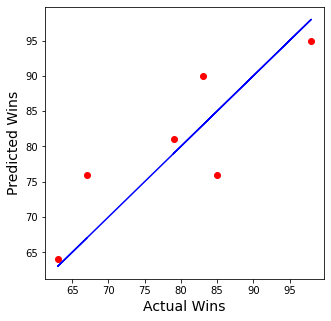

In [52]:
reg_func(DecisionTreeRegressor(),X,Y, 'DecisionTreeRegressor','dtr')

# D) K Neighbors Regressor

R2 Score : 0.7284560180438795
Cross validation score : -0.6891434766456634
R2 Score and CV Score Diff : 1.417599494689543
Mean squared error: 36.786666666666655
Mean Absolute error: 5.666666666666667


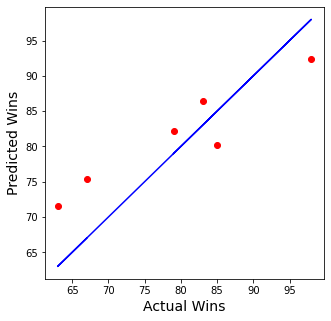

In [53]:
reg_func(KNN(),X,Y, 'KNN','knn')

# E. SVR

R2 Score : 0.16193395689066914
Cross validation score : -0.3792666831018122
R2 Score and CV Score Diff : 0.5412006399924814
Mean squared error: 113.53466922900576
Mean Absolute error: 8.572478614856658


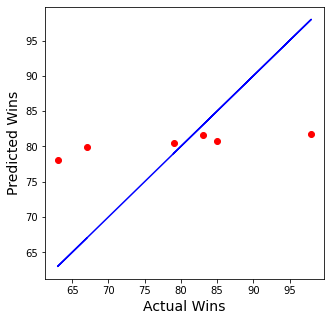

In [54]:
reg_func(SVR(),X,Y, 'SVR','svr')

# F) SGD Regressor

R2 Score : 0.9592506242572049
Cross validation score : -0.4081287005654509
R2 Score and CV Score Diff : 1.3673793248226558
Mean squared error: 5.520408486044779
Mean Absolute error: 1.91049759620266


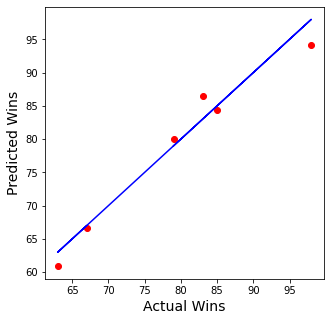

In [55]:
reg_func(SGDRegressor(),X,Y, 'SGDRegressor','sgd')

# Lasso Regressor (Regularization)

R2 Score : 0.9075072165078374
Cross validation score : -0.15423793176409156
R2 Score and CV Score Diff : 1.061745148271929
Mean squared error: 12.530202919202148
Mean Absolute error: 3.194906428743638


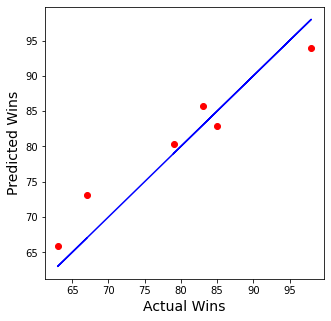

In [56]:
reg_func(Lasso(),X,Y, 'Lasso','l')

In [57]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5
lr,LinearRegression,0.957508,-0.457831,1.415339,5.756492,1.95197
rfr,RandomForestRegressor,0.660369,-0.889662,1.550031,46.010583,5.595
dtr,DecisionTreeRegressor,0.72319,-2.027977,2.751167,37.5,5.166667
knn,KNN,0.728456,-0.689143,1.417599,36.786667,5.666667
svr,SVR,0.161934,-0.379267,0.541201,113.534669,8.572479
sgd,SGDRegressor,0.959251,-0.408129,1.367379,5.520408,1.910498
l,Lasso,0.907507,-0.154238,1.061745,12.530203,3.194906


In [58]:
model_stats.columns = ['Model','R2 Score', 'Cross Validation Score', 'Difference','Mean Sq Error','Mean Abs Error']
model_stats

,Model,R2 Score,Cross Validation Score,Difference,Mean Sq Error,Mean Abs Error
lr,LinearRegression,0.957508,-0.457831,1.415339,5.756492,1.95197
rfr,RandomForestRegressor,0.660369,-0.889662,1.550031,46.010583,5.595
dtr,DecisionTreeRegressor,0.72319,-2.027977,2.751167,37.5,5.166667
knn,KNN,0.728456,-0.689143,1.417599,36.786667,5.666667
svr,SVR,0.161934,-0.379267,0.541201,113.534669,8.572479
sgd,SGDRegressor,0.959251,-0.408129,1.367379,5.520408,1.910498
l,Lasso,0.907507,-0.154238,1.061745,12.530203,3.194906


# Visualizing R2 Score for all Models

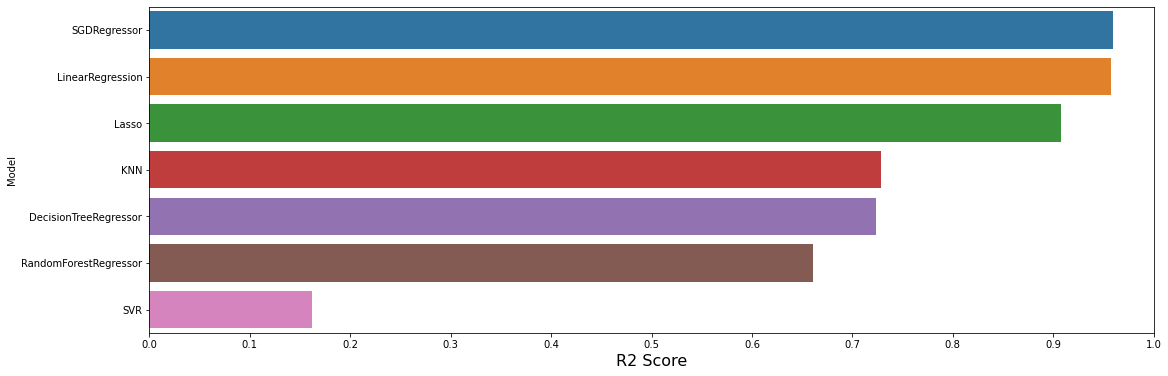

In [59]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['R2 Score'], ascending=False, inplace=True)

sns.barplot(x='R2 Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Regressor is giving the highest R2 Score = 86%

# Visualizing Cross Validation Score for all Models

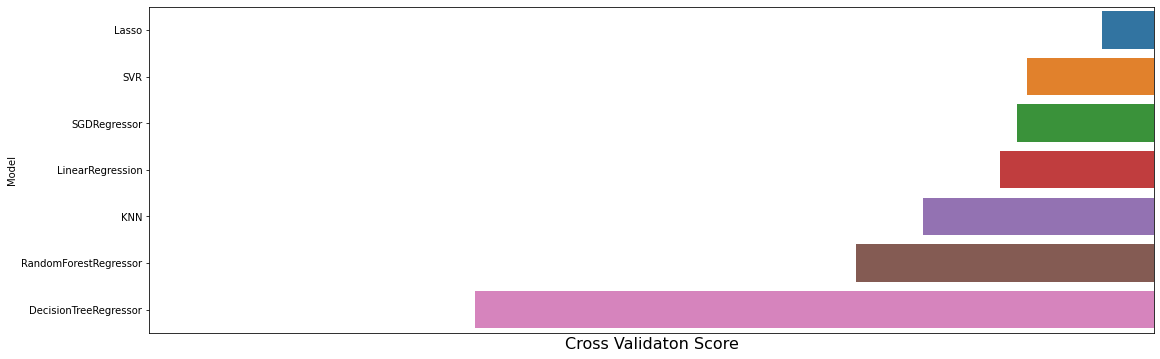

In [60]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(-3.0,0)
axe.set_xticks(np.arange(0, -3.0, 0.1))
plt.show()

Observation - CV score is negative due to very small sample data set.

# Visualizing Mean Square Error for all Models

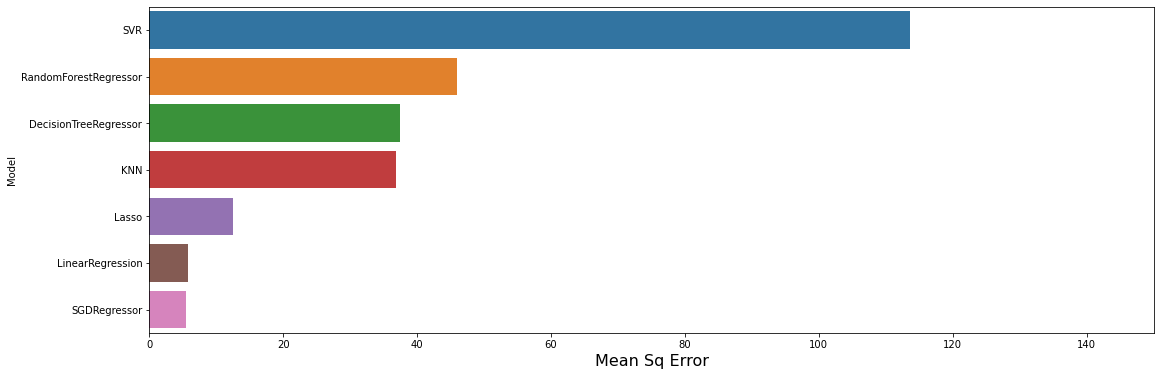

In [61]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Mean Sq Error'], ascending=False, inplace=True)

sns.barplot(x='Mean Sq Error', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Mean Sq Error', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,150)
axe.set_xticks(np.arange(0, 150, 20))
plt.show()

Observation - Linear Regression has lowest mean square error.

# Hyper Parameter Tuning with Lasso Regressor

In [66]:
from sklearn.model_selection import GridSearchCV
# Lasso Regressor
parameters =  {'fit_intercept':['True','False'],
               'max_iter':[1000,2000,3000],
               'selection':['cyclic','random']}
GCV = GridSearchCV(Lasso(),parameters, cv=10, n_jobs=-1,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_params_

{'fit_intercept': 'True', 'max_iter': 2000, 'selection': 'random'}

R2 Score : 0.9074400276994901
Cross validation score : -0.15431052482368696
R2 Score and CV Score Diff : 1.061750552523177
Mean squared error: 12.539305136377413
Mean Absolute error: 3.19557984153748


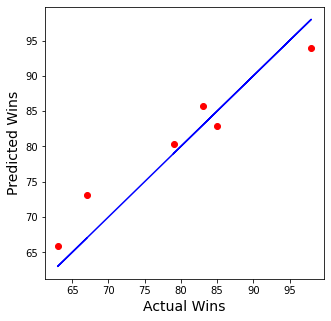

In [67]:
GCV.best_estimator_
la = Lasso(  fit_intercept = 'True', max_iter = 2000, selection = 'random') 
reg_func(la, X, Y,'Lasso Regressor','la')

# Saving the Model

In [69]:
import pickle
filename = 'baseball_study.pkl'
pickle.dump(la,open(filename,'wb'))

# Conclusion

In [70]:
loaded_model = pickle.load(open('baseball_study.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

90.744002769949


R2 Score - 90.74%

In [71]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5
Predicted,73.089582,65.838989,93.965843,82.931608,85.764262,80.378097
Original,67.000000,63.000000,98.000000,85.000000,83.000000,79.000000


# This Model is 90.74% Accurate